Whtiney Kenner u0777962 5/17/23 HW1


In [2]:

#computing the mean
def getMean(array):
    addedValues = 0.0
    for element in array:
        addedValues+= element
    mean = addedValues/array.size
    return mean

In [3]:
import math

#computing the standard deviation
def getStandardDeviation(array, mean):
    addedSqDist = 0.0
    for element in array:
        addedSqDist += (element - mean) ** 2
    stddev = math.sqrt(addedSqDist /array.size)
    return stddev

In [4]:

import numpy as np
randomArray = np.random.rand(100000)
print("Randomly generated array: ")

mean = getMean(randomArray)
stddev = getStandardDeviation(randomArray, mean)
print("The mean is: ", mean)
print("The standard deviation is: ", stddev)


Randomly generated array: 
The mean is:  0.5024051216914154
The standard deviation is:  0.2876617053281324


What happens (to the mean/std dev) when you increase the number of random numbers from 100 to 100000?
The mean gets closer to 50 (my range is 1-100)
the stddev gets closer to 30
both of these are expected!

In [5]:
import scipy as sc
norm = sc.stats.norm
numbers = norm.rvs(size=10000)
mean = getMean(numbers)
stddev = getStandardDeviation(numbers, mean)
print("The mean is: ", mean)
print("The standard deviation is: ", stddev)

meanBuiltIn = np.mean(numbers)
stddevBuiltIn = np.std(numbers)
print("The built in mean is: ", meanBuiltIn)
print("The built in stddev is: ", stddevBuiltIn)


The mean is:  -0.008051830871370388
The standard deviation is:  1.0031920983737883
The built in mean is:  -0.008051830871370364
The built in stddev is:  1.0031920983737874


What does the results of the mean/std dev of this data tell you about Scipy's norm's rvs function?
The mean is very close to 0 since we have a Gaussian distribution
the standard deviation is very close to 1
these numbers indicate that we are in fact getting a normal distribution

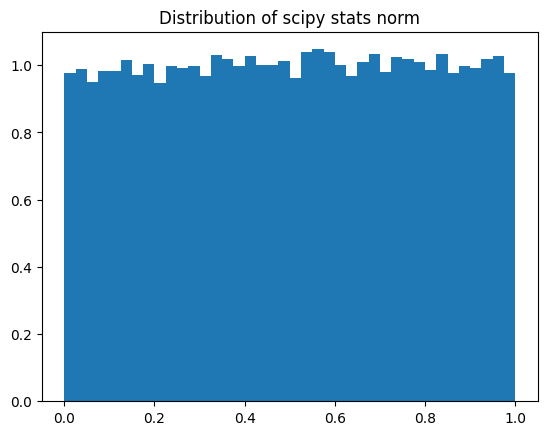

In [6]:
import matplotlib.pyplot as plt
plt.hist(randomArray, bins=40, density=True)
plt.title("Distribution of scipy stats norm")
plt.show()

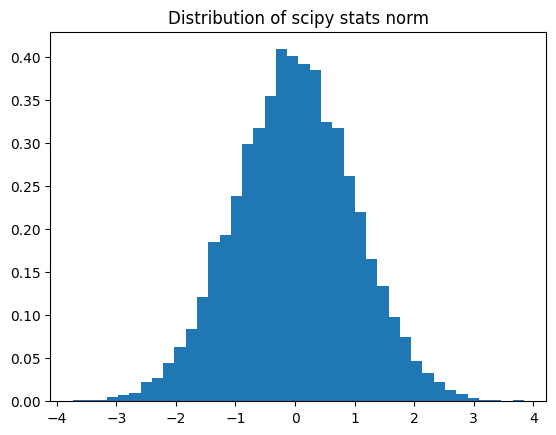

In [7]:
plt.hist(numbers, bins=40, density=True)
plt.title("Distribution of scipy stats norm")
plt.show()

                    Date  SF-MC
0    2021-01-01 00:00:00   20.9
1    2021-01-01 01:00:00   20.5
2    2021-01-01 02:00:00   23.0
3    2021-01-01 03:00:00   25.6
4    2021-01-01 04:00:00   24.0
...                  ...    ...
8755 2021-12-31 19:00:00    0.4
8756 2021-12-31 20:00:00    1.0
8757 2021-12-31 21:00:00    1.0
8758 2021-12-31 22:00:00    1.3
8759 2021-12-31 23:00:00    0.7

[8760 rows x 2 columns]


/var/folders/7y/nmsbr9zs5dd6wm4vy33skx600000gn/T/ipykernel_37736/2161934094.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.dates = pd.to_datetime(data['Date'])


<Axes: xlabel='Date'>

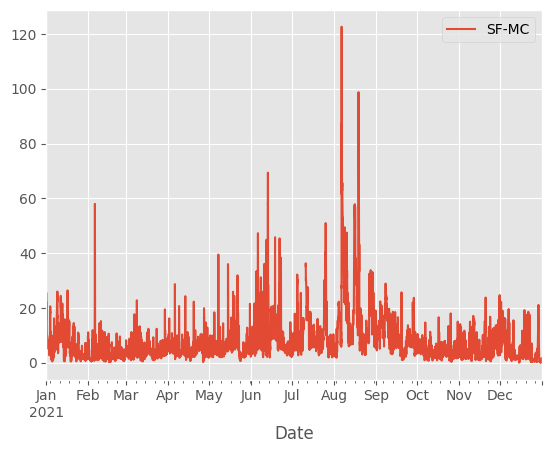

In [8]:
#part 2
#using ED-MC
import pandas as pd
plt.style.use( 'ggplot' )
data = pd.read_csv("2021.csv", usecols=['Date','SF-MC'], parse_dates=['Date'])
data.dates = pd.to_datetime(data['Date'])
print(data)
data.plot(x='Date', y='SF-MC')





                SF-MC
Date                 
2021-01-31   6.900808
2021-02-28   3.608185
2021-03-31   4.504858
2021-04-30   4.925417
2021-05-31   5.737769
2021-06-30   9.991389
2021-07-31   9.630932
2021-08-31  20.074194
2021-09-30   9.623922
2021-10-31   3.888710
2021-11-30   5.580972
2021-12-31   4.826478


[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

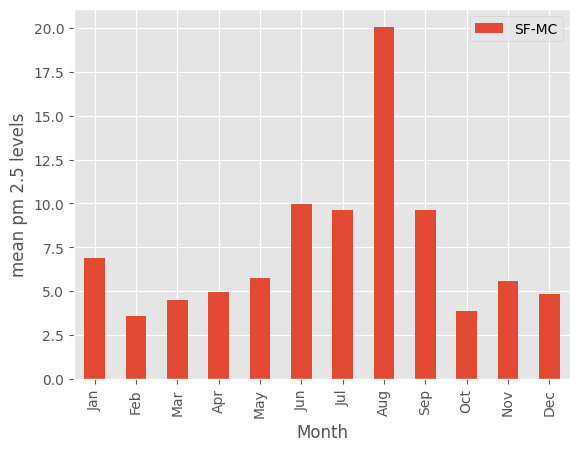

In [9]:
monthlyData = data.groupby(pd.Grouper(key='Date',axis=0, freq='M')).mean()
print(monthlyData)
monthplot = monthlyData.plot.bar()
monthplot.set_xlabel( "Month" )
monthplot.set_ylabel("mean pm 2.5 levels")
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']
monthplot.set_xticklabels(month_names)

Note any insights you can gain from this visualization: August is clearly the month with the highest pm 2.5 level, but this graph also smooths out the day to day fluctuations pictured above


                              Date     SF-MC
Date                                        
0    2021-07-02 00:00:00.000000000  7.879945
1    2021-07-02 01:00:00.000000000  7.345330
2    2021-07-02 02:00:00.000000000  7.256868
3    2021-07-02 03:00:00.000000000  7.202747
4    2021-07-02 04:00:00.000000000  7.298352
5    2021-07-02 05:00:00.000000000  7.685989
6    2021-07-02 05:59:59.999999744  8.047253
7    2021-07-02 06:59:59.999999744  8.224451
8    2021-07-02 08:00:00.000000256  8.026374
9    2021-07-02 09:00:00.000000256  7.820661
10   2021-07-02 10:00:00.000000256  7.851657
11   2021-07-02 11:00:00.000000000  7.493939
12   2021-07-02 12:00:00.000000000  6.858678
13   2021-07-02 13:00:00.000000000  6.561433
14   2021-07-02 14:00:00.000000000  6.432873
15   2021-07-02 15:00:00.000000000  6.255372
16   2021-07-02 16:00:00.000000000  6.508540
17   2021-07-02 17:00:00.000000000  6.913499
18   2021-07-02 18:00:00.000000000  7.392562
19   2021-07-02 19:00:00.000000000  8.211846
20   2021-

[Text(0, 0, '00'),
 Text(1, 0, '01'),
 Text(2, 0, '02'),
 Text(3, 0, '03'),
 Text(4, 0, '04'),
 Text(5, 0, '05'),
 Text(6, 0, '06'),
 Text(7, 0, '07'),
 Text(8, 0, '08'),
 Text(9, 0, '09'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23')]

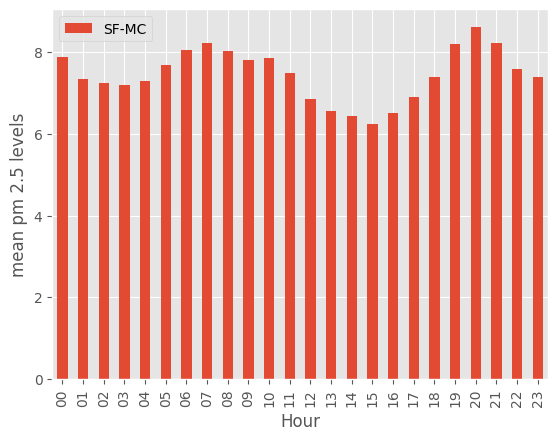

In [10]:
#Next, group the data by time of day (by hour), and plot the mean pollution level for each hour. What insights can you draw from this view of the data?
times = pd.DatetimeIndex(data.dates)
hourlyData = data.groupby([times.hour]).mean()
#hourlyData = data.groupby(pd.Grouper(key='Date', axis=0, freq='H')).mean()
print(hourlyData)
hourlyplot = hourlyData.plot.bar(x='Date', y='SF-MC')
hourlyplot.set_xlabel( "Hour" )
hourlyplot.set_ylabel("mean pm 2.5 levels")
hour_names = ['00','01','02','03','04','05','06','07','08','09','10','11','12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
hourlyplot.set_xticklabels(hour_names)

From the hourly graphing of mean pm 2.5 levels you can see where the peaks and valleys are in pollution. The peaks are around 7/8 am and 19/20, which generally lines up with rush hour traffic throughout the day

[Text(1, 0, 'Jan'),
 Text(2, 0, 'Feb'),
 Text(3, 0, 'Mar'),
 Text(4, 0, 'Apr'),
 Text(5, 0, 'May'),
 Text(6, 0, 'Jun'),
 Text(7, 0, 'Jul'),
 Text(8, 0, 'Aug'),
 Text(9, 0, 'Sep'),
 Text(10, 0, 'Oct'),
 Text(11, 0, 'Nov'),
 Text(12, 0, 'Dec')]

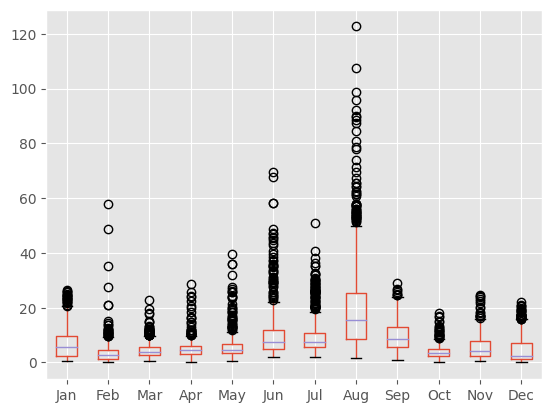

In [11]:
#The mean only gives us a very coarse view of the monthly/hourly data. Use "Box and Whisker" plots of the monthly and hourly data groupings to provide a more complete view of the data. Does this view provide any additional insights?

#monthly box and whisker plot
monthlyDataRaw = data.groupby([data['Date'].dt.month])
monthlyFig = monthlyDataRaw.boxplot(subplots=False)
monthlyFig.set_xticklabels(month_names)


[Text(1, 0, '00'),
 Text(2, 0, '01'),
 Text(3, 0, '02'),
 Text(4, 0, '03'),
 Text(5, 0, '04'),
 Text(6, 0, '05'),
 Text(7, 0, '06'),
 Text(8, 0, '07'),
 Text(9, 0, '08'),
 Text(10, 0, '09'),
 Text(11, 0, '10'),
 Text(12, 0, '11'),
 Text(13, 0, '12'),
 Text(14, 0, '13'),
 Text(15, 0, '14'),
 Text(16, 0, '15'),
 Text(17, 0, '16'),
 Text(18, 0, '17'),
 Text(19, 0, '18'),
 Text(20, 0, '19'),
 Text(21, 0, '20'),
 Text(22, 0, '21'),
 Text(23, 0, '22'),
 Text(24, 0, '23')]

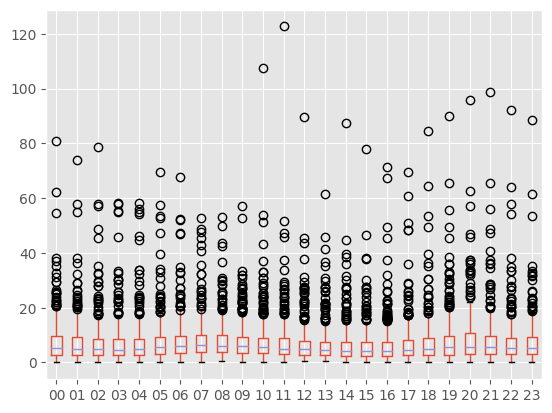

In [12]:
#hourly box and whisker plot
hourlyDataRaw = data.groupby([data['Date'].dt.hour])
print(hourlyDataRaw)
hourlyFig = hourlyDataRaw.boxplot(subplots=False)
hourlyFig.set_xticklabels(hour_names)